#### Import pandas and set up data. 


In [169]:
import pandas as pd

chip = pd.read_csv("dataset.tsv", sep="\t")
pd.set_option('display.max_rows', 100)
chip.head(100)

,_id,type,street,neighborhood,council_district
0,1,Crosswalk - Other,ELEVENTH ST,Central Business District,6.0
1,2,Crosswalk - Two Lined,PENN AVE,Strip District,7.0
2,3,Crosswalk - Two Lined,MORNINGSIDE AVE,Morningside,7.0
3,4,Crosswalk - Two Lined,TECH ST,Squirrel Hill North,8.0
4,5,Crosswalk - Two Lined,FREW ST,Squirrel Hill South,5.0
5,6,Crosswalk - Two Lined,FORBES AVE,Squirrel Hill North,8.0
6,7,Crosswalk - Two Lined,BEELER ST,Squirrel Hill North,8.0
7,8,Crosswalk - Two Lined,BEELER ST,Squirrel Hill North,8.0
8,9,Crosswalk - Continental,FORBES AVE,Squirrel Hill North,8.0
9,10,Crosswalk - Continental,FIFTH AVE,Shadyside,8.0


## Crosswalks used by Pedestrians
How many crosswalks- continental are there in total in this dataset. And in which neighbrohood are the crossswalks in? 

Listed the crosswalks-continental and which neighborhood they are in. 

## Count the number of neighborhoods that have most crosswalks 
After finding out how many crosswalks-continental are there in total in the datasets and which neighborhood it is in: 

Found the neighborhood that has the most crosswalks-continental. (Added a column that counts the number of occurrences of each neighborhood)

In [171]:
# Filter for continental crosswalks
continental_crosswalks = chip[chip['type'] == 'Crosswalk - Continental']

# Count the total number of continental crosswalks
total_continental_crosswalks = continental_crosswalks.shape[0]

# List the crosswalks and their neighborhoods
crosswalks_neighborhoods = continental_crosswalks[['type', 'neighborhood']]

# Count the occurrences of each neighborhood
neighborhood_counts = crosswalks_neighborhoods['neighborhood'].value_counts().reset_index()
neighborhood_counts.columns = ['neighborhood', 'count']

# Merge the counts back into the original DataFrame
crosswalks_neighborhoods = crosswalks_neighborhoods.merge(neighborhood_counts, on='neighborhood')

# Analyze only the first 100 rows
crosswalks_neighborhoods_first_100 = crosswalks_neighborhoods.head(100)

print("Total number of continental crosswalks: ", total_continental_crosswalks)
print(crosswalks_neighborhoods_first_100)

Total number of continental crosswalks:  703
                       type               neighborhood  count
0   Crosswalk - Continental        Squirrel Hill North     29
1   Crosswalk - Continental                  Shadyside     34
2   Crosswalk - Continental                  Shadyside     34
3   Crosswalk - Continental                  Shadyside     34
4   Crosswalk - Continental        Squirrel Hill North     29
5   Crosswalk - Continental                  Shadyside     34
6   Crosswalk - Continental                  Shadyside     34
7   Crosswalk - Continental              North Oakland     72
8   Crosswalk - Continental              North Oakland     72
9   Crosswalk - Continental              North Oakland     72
10  Crosswalk - Continental              North Oakland     72
11  Crosswalk - Continental              North Oakland     72
12  Crosswalk - Continental              North Oakland     72
13  Crosswalk - Continental              North Oakland     72
14  Crosswalk - Continent

## Data visualization
In order to have a visualization of the occurences of crosswalks in each neighborhood in the dataset, I added a bar graph. 

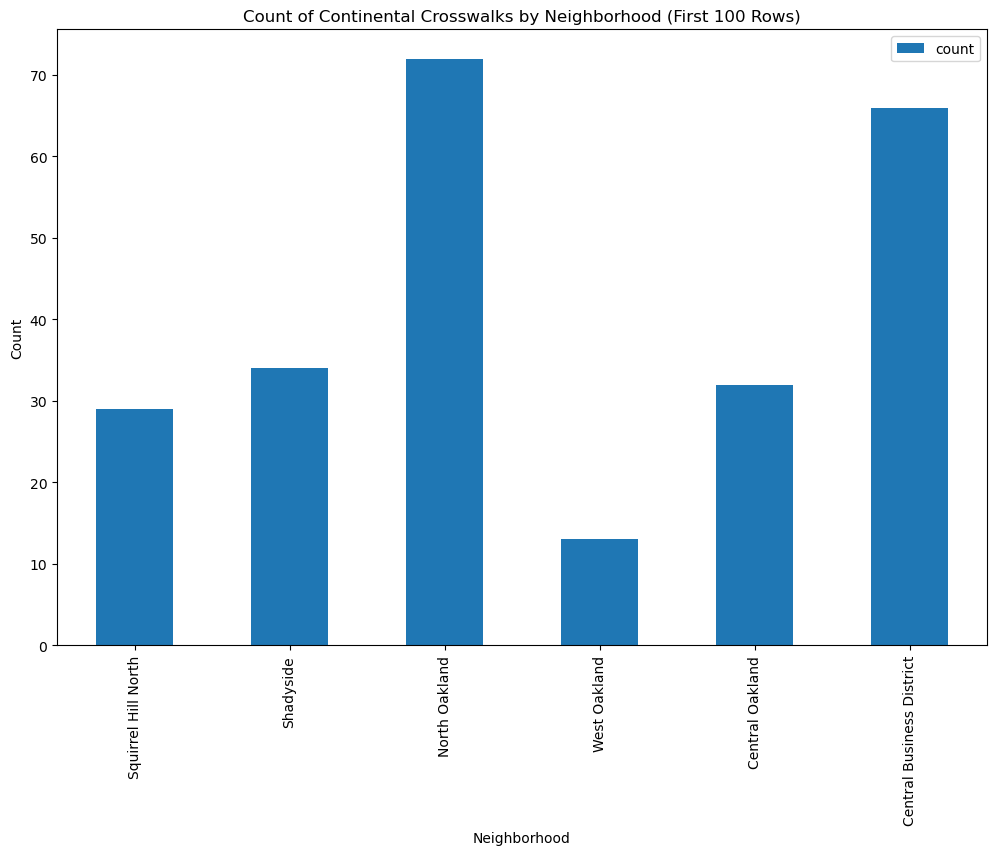

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new DataFrame with unique neighborhoods and their counts
unique_neighborhood_counts = crosswalks_neighborhoods_first_100[['neighborhood', 'count']].drop_duplicates()

# Create the bar graph
unique_neighborhood_counts.plot(kind='bar', x='neighborhood', y='count', figsize=(12, 8))

# Add title and labels
plt.title('Count of Continental Crosswalks by Neighborhood (First 100 Rows)')
plt.xlabel('Neighborhood')
plt.ylabel('Count')

# Show the plot
plt.show()

### Purvi's Reflection 
Based on the bar graph presented, North Oakland and the Central Business District have the highest number of continental crosswalks, with North Oakland having 72 crosswalks and the Central Business District having 66. This data suggests that North Oakland is the best neighborhood for pedestrian transportation due to its higher number of crosswalks, making it comparatively safer for pedestrians.

However, my personal preference for transportation by walking is Shadyside. I appreciate the convenience of the numerous shopping stores and food spots in the area, which I miss from home. Despite the dataset indicating North Oakland as the best neighborhood for pedestrian transport, I favor Shadyside for its variety of stores and overall convenience.s.